In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
df = pd.read_csv('AirPassengers.csv')
df_2 = pd.read_csv('AirPassengers.csv', index_col="Month")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
# change the name of #passenger column by rename command
df.rename(columns={'#Passengers':'Number of Passengers',
                   'Month':'Date'}, 
                   inplace=True)
df

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


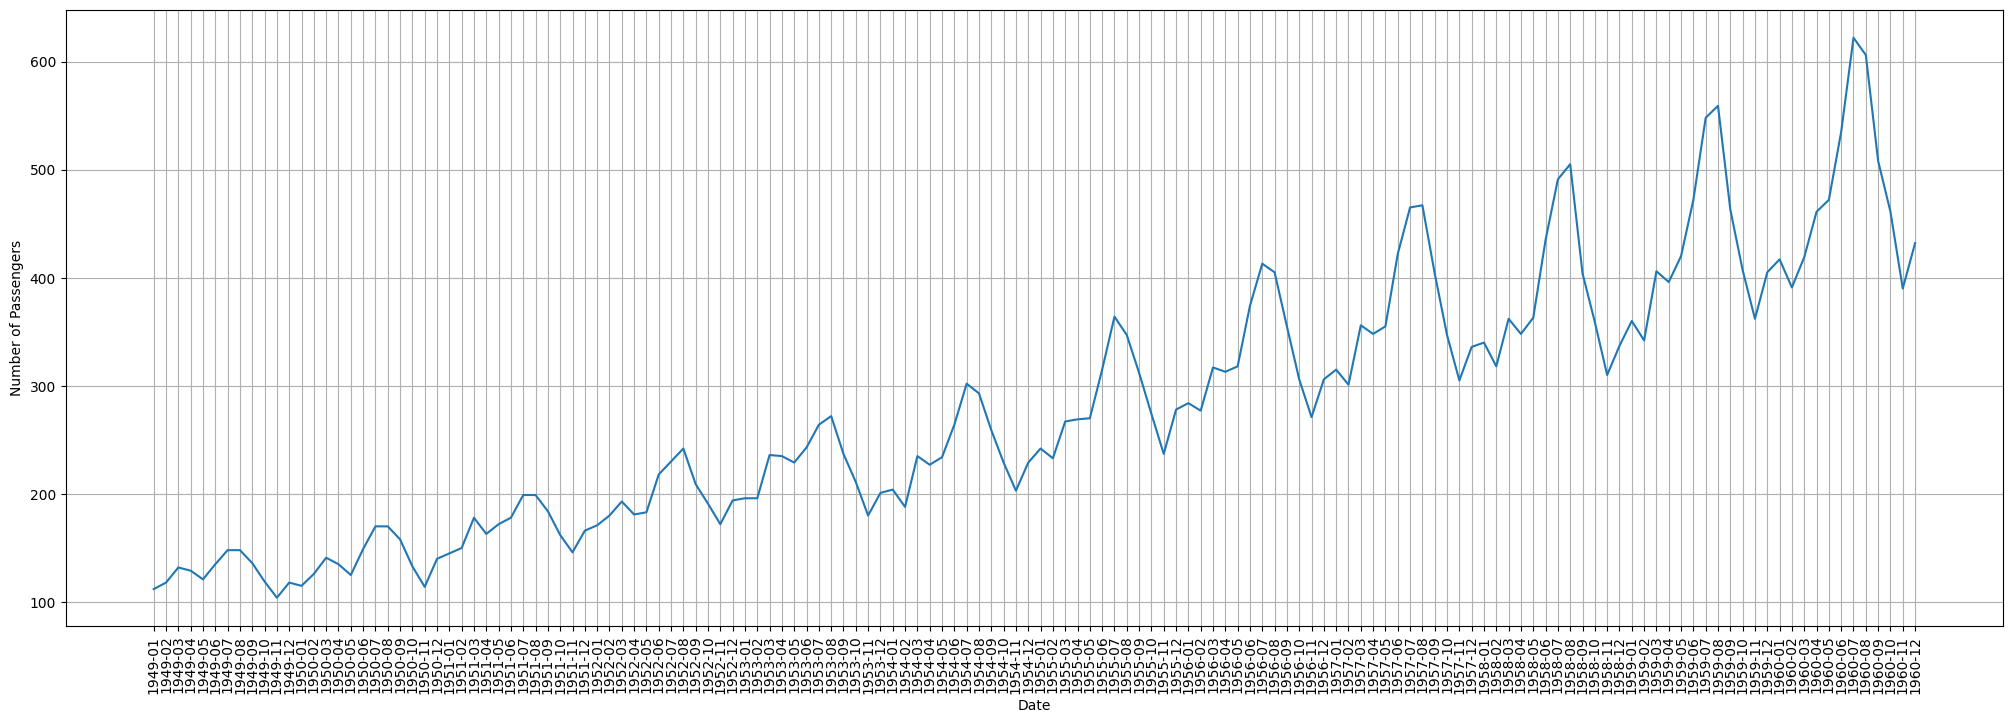

In [21]:
plt.figure(figsize=(25, 8))
plt.grid(True)
sns.lineplot(df, x='Date', y='Number of Passengers')
# set the x labels to be vertical
plt.xticks(rotation=90)
plt.show()

In [22]:
# plot the same plot using plotly
import plotly.express as px
fig = px.line(df, x='Date', y='Number of Passengers', title='Number of Passengers over time')
fig.show()

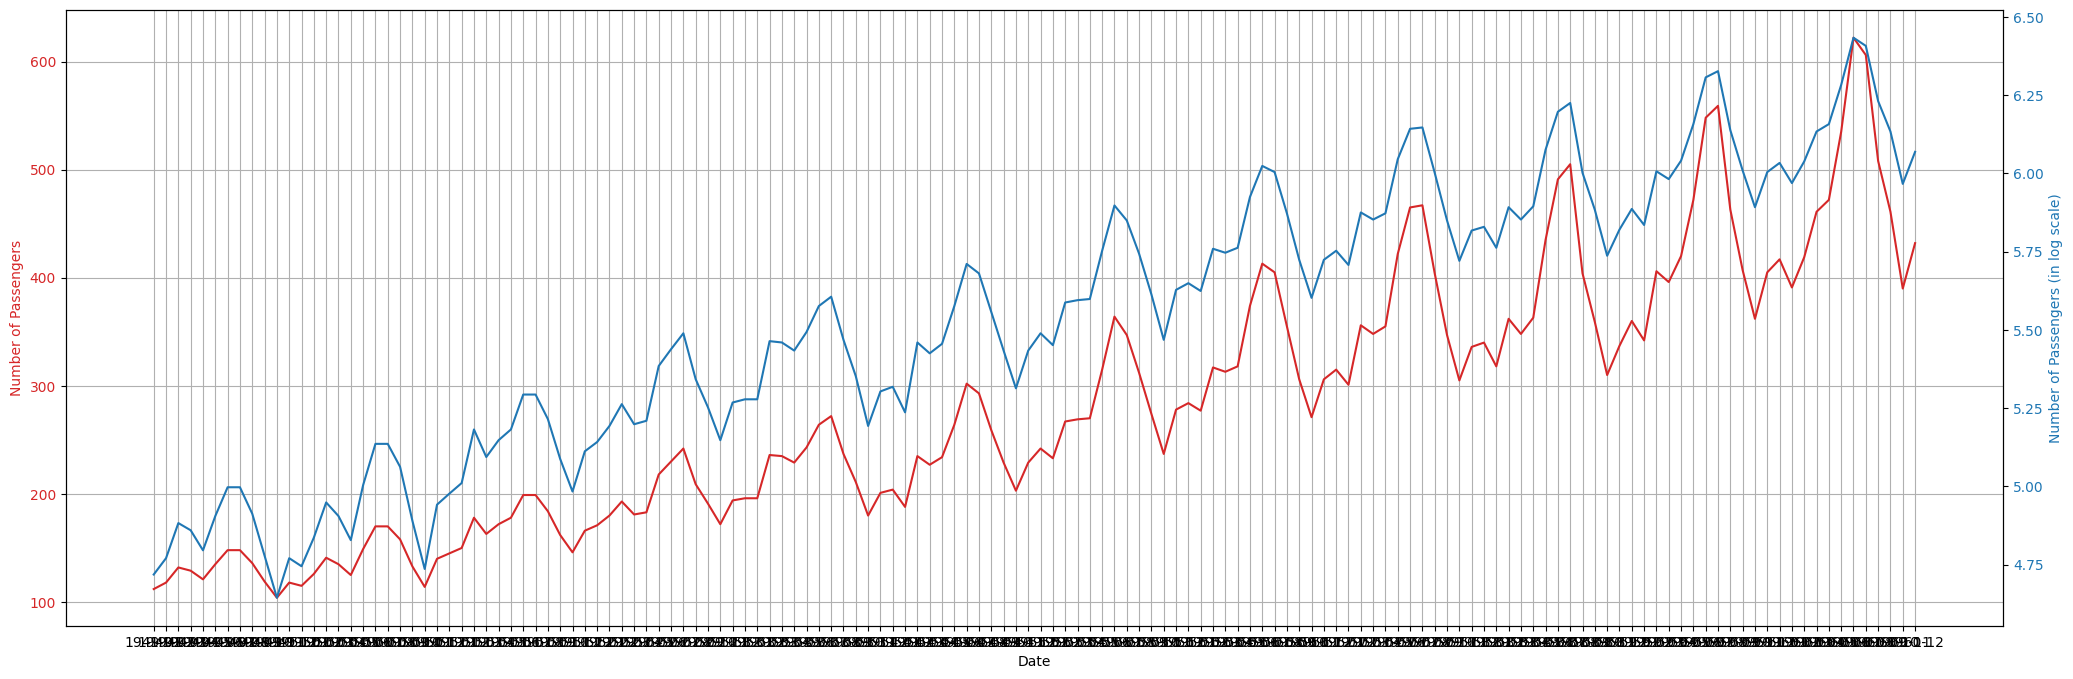

In [24]:
# make a dual y axis plot
fig, ax1 = plt.subplots(figsize=(25, 8))
plt.grid(True)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Passengers', color=color)
ax1.plot(df['Date'], df['Number of Passengers'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Passengers (in log scale)', color=color)
ax2.plot(df['Date'], np.log(df['Number of Passengers']), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.show()


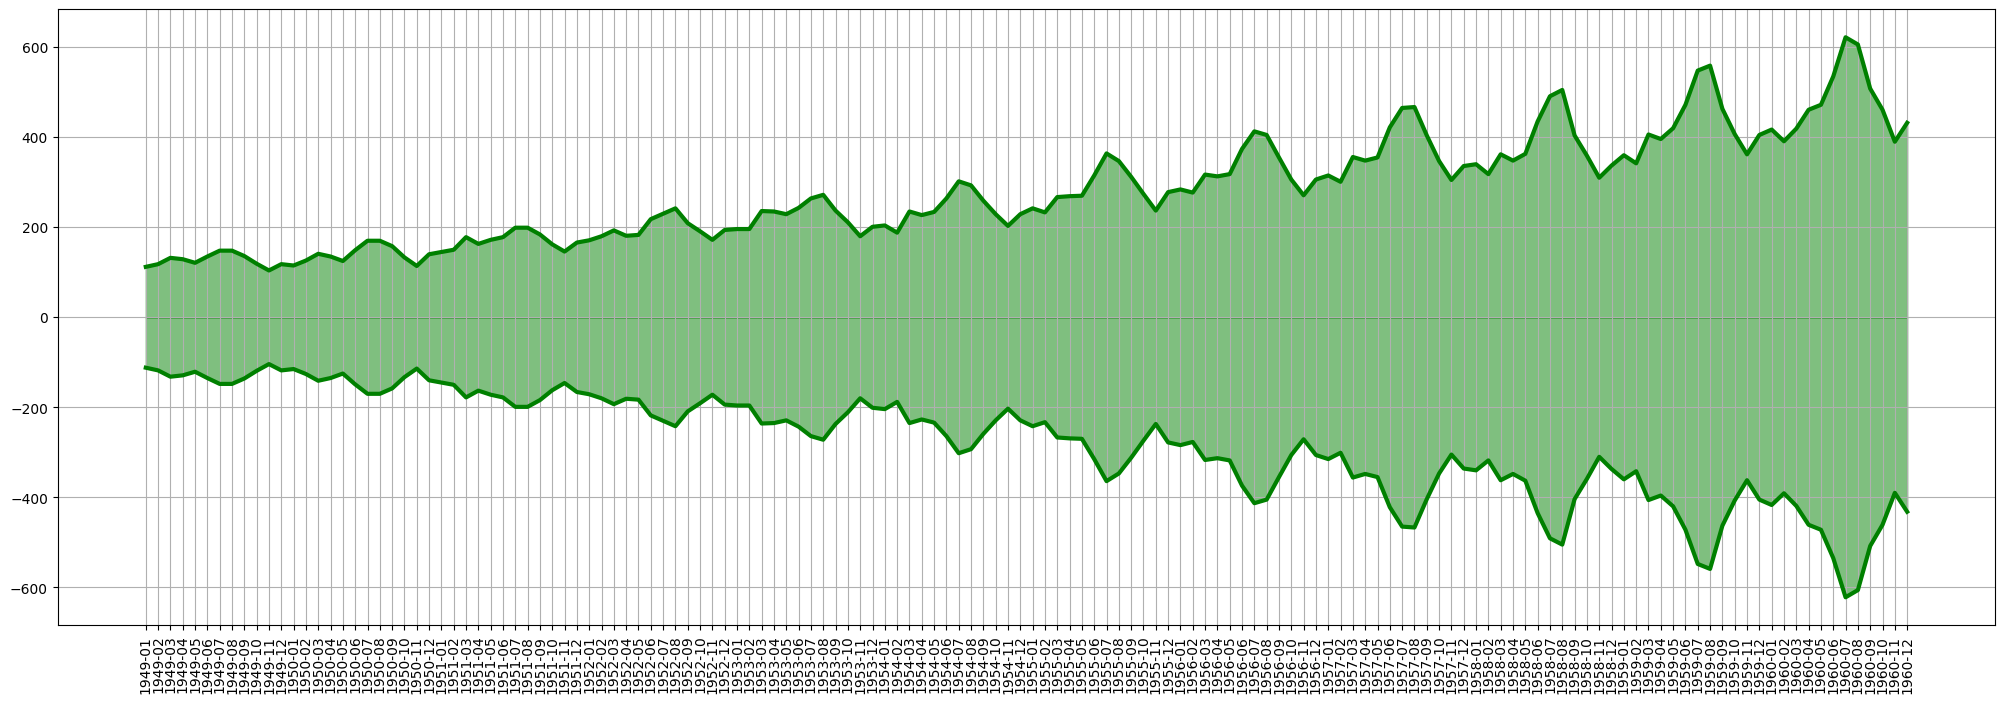

In [32]:
# make the graph mirrored around x-axis with filled shade between y values
plt.figure(figsize=(25, 8))
plt.fill_between(df['Date'], df['Number of Passengers'], color="green", alpha=0.5)
plt.fill_between(df['Date'], -df['Number of Passengers'], color="green", alpha=0.5)
plt.grid(True)
# thicken the line
plt.plot(df['Date'], df['Number of Passengers'], color='green', linewidth=3)
# thicken the other line also
plt.plot(df['Date'], -df['Number of Passengers'], color='green', linewidth=3)

# xticks verticle
plt.xticks(rotation=90)
plt.show()


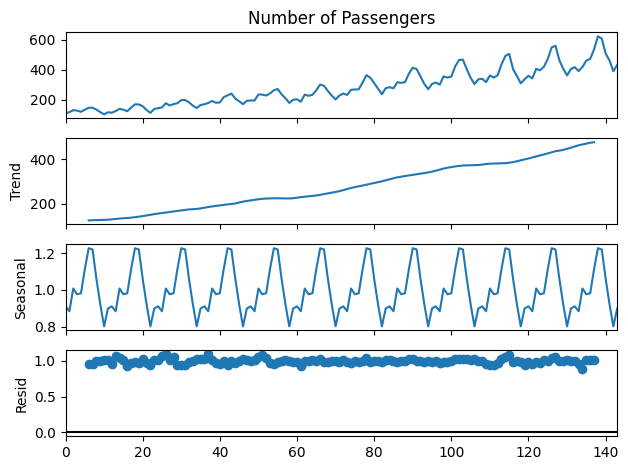

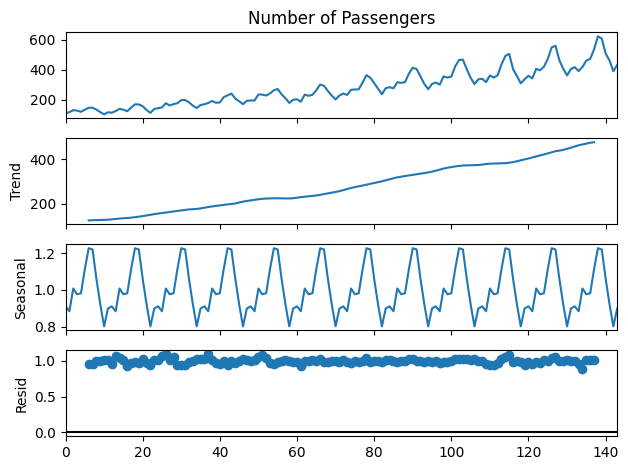

In [33]:
decomposed = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)
decomposed.plot()